# RESAMPLING PHOENIX FILES TO MATCH IGRINS

## Table of Contents <a class ="tocSkip">


[Resampling Code](http://localhost:8888/notebooks/CJ_Astro/resample.ipynb#Spectra-Resampling-Code:-courtesy-of-ACCarnall)

### Importing Python packages

In [3]:
from astropy.io import fits
from astropy.utils.data import get_pkg_data_filename
import scipy as sp
import numpy as np
from scipy import *
from decimal import Decimal
import numpy as np #imports numpy
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D     
import seaborn as sns # provides a high-level interface to draw statitistical graphics
from pylab import *
%config InlineBackend.figure_format = 'retina' #makes images clearer
%matplotlib inline 
#^put plots in line?
from scipy.constants import parsec as pc

### Importing spectra files

In [9]:
hdu = fits.open("../Desktop/CJ_Astro/SDCH_20150425_0064.spec_a0v.fits")
#hdu.info()
var = fits.open("../Desktop/CJ_Astro/SDCH_20150425_0064.variance.fits")
#var.info()

Filename: ../Desktop/CJ_Astro/SDCH_20150425_0064.spec_a0v.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  SPEC_DIVIDE_A0V    1 PrimaryHDU     183   (2048, 28)   float64   
  1  WAVELENGTH    1 ImageHDU       184   (2048, 28)   float64   
  2  TGT_SPEC      1 ImageHDU       184   (2048, 28)   float32   
  3  A0V_SPEC      1 ImageHDU       184   (2048, 28)   float32   
  4  VEGA_SPEC     1 ImageHDU       184   (2048, 28)   float64   
Filename: ../Desktop/CJ_Astro/SDCH_20150425_0064.variance.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     181   (2048, 28)   float32   


#### Calling certain files and renaming them

In [32]:
dat = hdu[0]
wav = hdu[1]

varx = var[0]

### Important Values and conversions

In [136]:
# Important values
dM67_PC = 900 # Distance to M67 in parsecs
pc_cm = 3.0856776e18
#Spc_Scm = 9.5214e36   # 1 sq pc = 9.5214 * 10^36  sq cm
dM67_cm = dM67_PC * pc_cm # Distance to M67 in centimeters
InvSq = 4*pi*dM67_cm**2
cm_A = 1e8 # converting centimeters to angstroms
Angstroms = 1e4 # microns


### Order 110 editing

In [77]:
o110 = 12

flux110 = dat.data[o110]
fluxcut110 = flux110[~np.isnan(flux110)]

wav110 = wav.data[o110] * Angstroms
wavecut110 = wav110[~np.isnan(flux110)]

#### Trimming out saturated data

In [87]:
trim110 = (wavecut110 > 16230) & (wavecut110 < 16400)
trim110.sum()

1559

In [96]:
wavetrim110 = wavecut110[trim110]
fluxtrim110 = fluxcut110[trim110]
print(len(wavetrim110))
print(len(fluxtrim110))

1559
1559


## Importing PHOENIX Wave Files

In [31]:
varPHX = fits.open("../Desktop/CJ_Astro/WAVE_PHOENIX-ACES-AGSS-COND-2011 (2).fits")
PHXwave = varPHX[0].data
varPHX.info()


Filename: ../Desktop/CJ_Astro/WAVE_PHOENIX-ACES-AGSS-COND-2011 (2).fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       8   (1569128,)   float64   


# Importing Spectra and Headers from PHOENIX
### Same exact thing as in TableFits2.1

## 4000 K_40

In [59]:

hdu04000_40 = fits.open("../Desktop/CJ_Astro/lte04000-4.00-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")  # open a FITS file
flux04000_40 = hdu04000_40[0].data #in terms of joules
hdu04000_40_file = get_pkg_data_filename("../Desktop/CJ_Astro/lte04000-4.00-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")


PHXREFF04000_40 = fits.getval(hdu04000_40_file, 'PHXREFF')


StelArea04000_40 = 4*pi*PHXREFF04000_40**2 # cm^2     # surface area in square centimeters
StelFluxEarth04000_40 = flux04000_40/cm_A*StelArea04000_40/(InvSq) # cm^2/pc     # conversion for stellar flux as seen from Earth (multiply by flux######)
print(len(StelFluxEarth04000_40))
print(len(PHXwave))




1569128
1569128
2048


## 5100 K_40

In [134]:
hdu05100_40 = fits.open("../Desktop/CJ_Astro/lte05100-4.00-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")  # open a FITS file
flux05100_40 = hdu05100_40[0].data #in terms of joules
hdu05100_40_file = get_pkg_data_filename("../Desktop/CJ_Astro/lte05100-4.00-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")


PHXREFF05100_40 = fits.getval(hdu05100_40_file, 'PHXREFF')

StelArea05100_40 = 4*pi*PHXREFF05100_40**2 # cm^2     # surface area in square centimeters
StelFluxEarth05100_40 = flux05100_40/cm_A*StelArea05100_40/(InvSq) # cm^2/pc     # conversion for stellar flux as seen from Earth (multiply by flux######)


## Resampling  (see bottom of page for code)

In [107]:
reSFE04000_40 = spectres(wavetrim110,PHXwave,StelFluxEarth04000_40)
#print(reSFE04000_40)
#print(len(reSFE04000_40))
reSFE05100_40 = spectres(wavetrim110,PHXwave,StelFluxEarth05100_40)


### Scaling 

In [113]:
med_trimflux110 = np.median(fluxtrim110)
fluxtrim110_med = fluxtrim110/med_trimflux110


In [127]:
med_reSFE0400_40 = np.median(reSFE05100_40)
reSFE05100_40_med = reSFE05100_40/med_reSFE0400_40

# Doppler Shift

#### Speed of light conversions

In [137]:
c = 299792458.0 # meters/sec
c_m = c # meters/sec
c_cm = c*1e2 #centimeters/sec
c_km = c*1e-3 #kilometers/sec

In [194]:
v1 = 45
#v2 = 20 
#c = 3e10 # cm/s
v2 = .0001*c #cm/s [redshift]
#v2 = -.0001*c #cm/s [blueshift]
wave_obsR = (sqrt((1+v1/c_km)/(1-v1/c_km))) # [redshift]
wave_obsB = (sqrt((1-v1/c_km)/(1+v1/c_km))) # [blueshift]
print(wave_obsB)
print(wave_obsR)

0.9998499074210518
1.0001501151101122


In [195]:
wavetrim110_obsB = wavetrim110*wave_obsB # [blueshift]
wavetrim110_obsR = wavetrim110*wave_obsR # [redshift]

## Cross-Correlation

In [196]:
a = [1,2,3,4]
b = [6,5,90]
np.correlate(a,b, "full")
#np.correlate(a,b)

array([ 90, 185, 286, 387,  38,  24])

In [197]:
print(np.correlate(wavetrim110, wavetrim110_obsR))
#print(np.correlate(wavetrim110_obsR, wavetrim110))

[4.15100852e+11]


## PLOTTING

#### With Doppler Shift

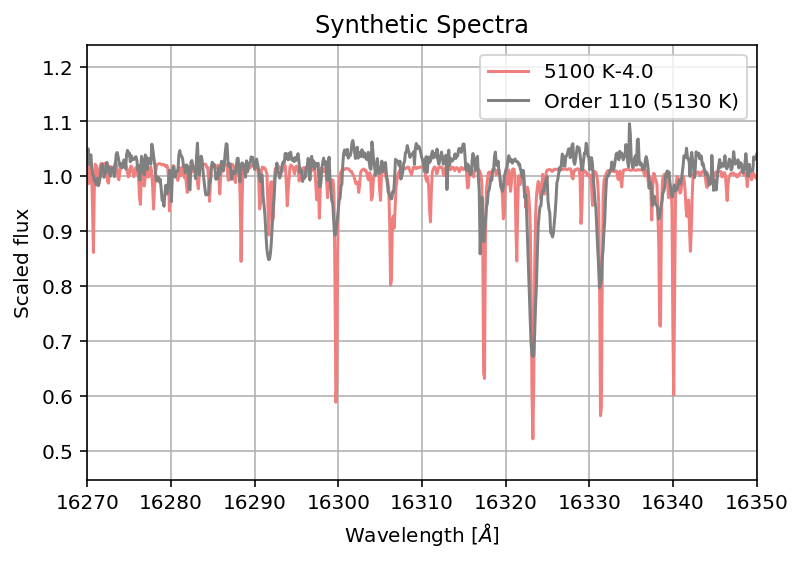

In [201]:
# plot Synthetic binary with redshift 
plt.plot(wavetrim110_obsR, reSFE05100_40_med, color = 'lightcoral', label = "5100 K-4.0")
# plot Synthetic binary with blueshift 
#plt.plot(wavetrim110_obsB, reSFE05100_40_med, color = 'skyblue', label = "5100 K-4.0")
plt.plot(wavetrim110_obsR, reSFE05100_40_med, color = 'lightcoral', label = "5100 K-4.0")
# Plot actual binary order-110
plt.plot(wavetrim110, fluxtrim110_med, color = 'gray', label = "Order 110 (5130 K)")
plt.xlabel("Wavelength [$\AA$]")
plt.ylabel("Scaled flux")
#plt.ylabel("Flux [erg/s/$cm^2$/$\AA$]")
xlim(16270,16350)
#ylim(5e-16,2e-15)
plt.title("Synthetic Spectra")
plt.legend()
plt.grid()
plt.show()

#### Without Doppler Shift

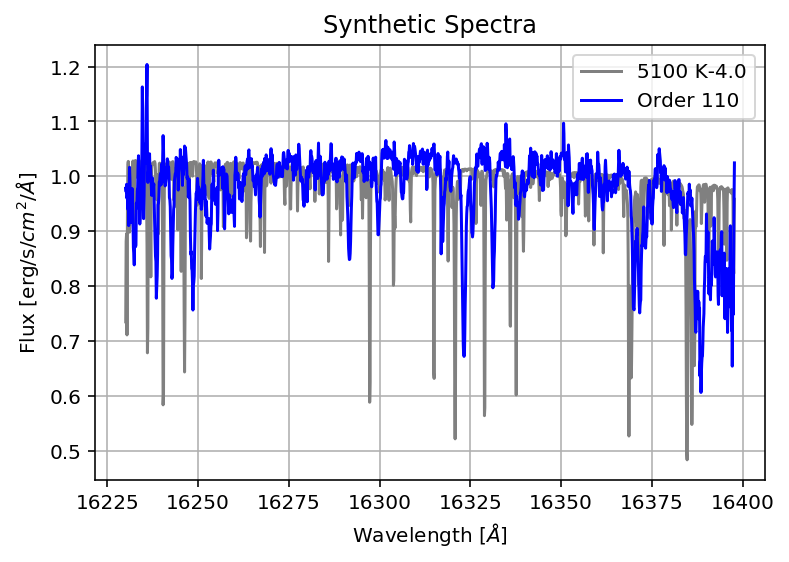

In [124]:
plt.plot(wavetrim110, reSFE05100_40_med, color = 'gray', label = "5100 K-4.0")
plt.plot(wavetrim110, fluxtrim110_med, color = 'blue', label = "Order 110")
plt.xlabel("Wavelength [$\AA$]")
plt.ylabel("Flux [erg/s/$cm^2$/$\AA$]")
#xlim(16170,16400)
#ylim(5e-16,2e-15)
plt.title("Synthetic Spectra")
plt.legend()
plt.grid()
plt.show()

# Spectra Resampling Code: courtesy of ACCarnall 
[GitHub code](https://github.com/ACCarnall/SpectRes/blob/master/spectres/spectral_resampling.py)

In [106]:

from __future__ import print_function, division, absolute_import

import numpy as np


def spectres(new_spec_wavs, old_spec_wavs, spec_fluxes, spec_errs=None):

    """
    Function for resampling spectra (and optionally associated
    uncertainties) onto a new wavelength basis.
    Parameters
    ----------
    new_spec_wavs : numpy.ndarray
        Array containing the new wavelength sampling desired for the
        spectrum or spectra.
    old_spec_wavs : numpy.ndarray
        1D array containing the current wavelength sampling of the
        spectrum or spectra.
    spec_fluxes : numpy.ndarray
        Array containing spectral fluxes at the wavelengths specified in
        old_spec_wavs, last dimension must correspond to the shape of
        old_spec_wavs. Extra dimensions before this may be used to
        include multiple spectra.
    spec_errs : numpy.ndarray (optional)
        Array of the same shape as spec_fluxes containing uncertainties
        associated with each spectral flux value.
    Returns
    -------
    res_fluxes : numpy.ndarray
        Array of resampled flux values, first dimension is the same
        length as new_spec_wavs, other dimensions are the same as
        spec_fluxes.
    resampled_errs : numpy.ndarray
        Array of uncertainties associated with fluxes in
        res_fluxes. Only returned if spec_errs was specified.
    """

    # Arrays of left-hand sides and widths for the old and new bins
    spec_lhs = np.zeros(old_spec_wavs.shape[0])
    spec_widths = np.zeros(old_spec_wavs.shape[0])
    spec_lhs = np.zeros(old_spec_wavs.shape[0])
    spec_lhs[0] = old_spec_wavs[0]
    spec_lhs[0] -= (old_spec_wavs[1] - old_spec_wavs[0])/2
    spec_widths[-1] = (old_spec_wavs[-1] - old_spec_wavs[-2])
    spec_lhs[1:] = (old_spec_wavs[1:] + old_spec_wavs[:-1])/2
    spec_widths[:-1] = spec_lhs[1:] - spec_lhs[:-1]
    
    filter_lhs = np.zeros(new_spec_wavs.shape[0]+1)
    filter_widths = np.zeros(new_spec_wavs.shape[0])
    filter_lhs[0] = new_spec_wavs[0]
    filter_lhs[0] -= (new_spec_wavs[1] - new_spec_wavs[0])/2
    filter_widths[-1] = (new_spec_wavs[-1] - new_spec_wavs[-2])
    filter_lhs[-1] = new_spec_wavs[-1]
    filter_lhs[-1] += (new_spec_wavs[-1] - new_spec_wavs[-2])/2
    filter_lhs[1:-1] = (new_spec_wavs[1:] + new_spec_wavs[:-1])/2
    filter_widths[:-1] = filter_lhs[1:-1] - filter_lhs[:-2]
    

    if filter_lhs[0] < spec_lhs[0] or filter_lhs[-1] > spec_lhs[-1]:
        raise ValueError("spectres: The new wavelengths specified must fall"
                         " within the range of the old wavelength values.")

    # Generate output arrays to be populated
    res_fluxes = np.zeros(spec_fluxes[..., 0].shape + new_spec_wavs.shape)

    if spec_errs is not None:
        if spec_errs.shape != spec_fluxes.shape:
            raise ValueError("If specified, spec_errs must be the same shape"
                             " as spec_fluxes.")
        else:
            res_fluxerrs = np.copy(res_fluxes)

    start = 0
    stop = 0

    # Calculate new flux and uncertainty values, loop over new bins
    for j in range(new_spec_wavs.shape[0]):

        # Find first old bin which is partially covered by the new bin
        while spec_lhs[start+1] <= filter_lhs[j]:
            start += 1

        # Find last old bin which is partially covered by the new bin
        while spec_lhs[stop+1] < filter_lhs[j+1]:
            stop += 1

        # If new bin is fully within one old bin these are the same
        if stop == start:

            res_fluxes[..., j] = spec_fluxes[..., start]
            if spec_errs is not None:
                res_fluxerrs[..., j] = spec_errs[..., start]

        # Otherwise multiply the first and last old bin widths by P_ij
        else:

            start_factor = ((spec_lhs[start+1] - filter_lhs[j])
                            / (spec_lhs[start+1] - spec_lhs[start]))

            end_factor = ((filter_lhs[j+1] - spec_lhs[stop])
                          / (spec_lhs[stop+1] - spec_lhs[stop]))

            spec_widths[start] *= start_factor
            spec_widths[stop] *= end_factor

            # Populate res_fluxes spectrum and uncertainty arrays
            f_widths = spec_widths[start:stop+1]*spec_fluxes[..., start:stop+1]
            res_fluxes[..., j] = np.sum(f_widths, axis=-1)
            res_fluxes[..., j] /= np.sum(spec_widths[start:stop+1])

            if spec_errs is not None:
                e_wid = spec_widths[start:stop+1]*spec_errs[..., start:stop+1]

                res_fluxerrs[..., j] = np.sqrt(np.sum(e_wid**2, axis=-1))
                res_fluxerrs[..., j] /= np.sum(spec_widths[start:stop+1])

            # Put back the old bin widths to their initial values for later use
            spec_widths[start] /= start_factor
            spec_widths[stop] /= end_factor

    # If errors were supplied return the res_fluxes spectrum and error arrays
    if spec_errs is not None:
        return res_fluxes, res_fluxerrs

    # Otherwise just return the res_fluxes spectrum array
    else:
        return res_fluxes
